In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [50]:
df = pd.read_csv('matches.csv', index_col=0) 

In [56]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [57]:
def preprocessing_data(df):
    list_of_teams = ['Manchester City','Liverpool']
    list_of_attributes = ['gf','ga','xg','xga','poss','sh','sot','dist','fk']
    df = df.loc[:, ['gf','ga','xg','xga','poss','sh','sot','dist','fk','team']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 1:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    return data

In [58]:
data = preprocessing_data(df)


{'Manchester City': {'gf': 0.2222222222222222, 'ga': 0.09407948094079481, 'xg': 0.3673141160460225, 'xga': 0.11864406779661016, 'poss': 0.78125, 'sh': 0.5651047798445962, 'sot': 0.40194647201946476, 'dist': 0.3737373737373737}, 'Liverpool': {'gf': 0.23292181069958848, 'ga': 0.10617283950617283, 'xg': 0.30508474576271183, 'xga': 0.18066541117388576, 'poss': 0.6891203703703703, 'sh': 0.5400238948626046, 'sot': 0.3871604938271605, 'dist': 0.38558423743608927}}


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (9).

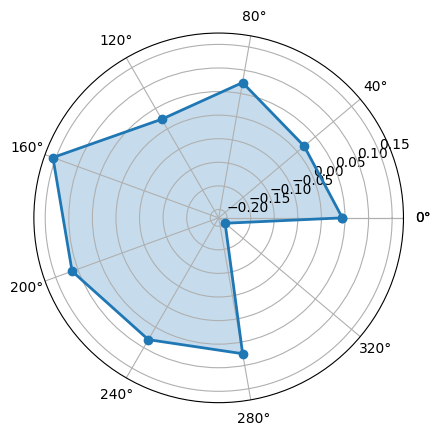

In [55]:
# Tên các thuộc tính
attributes = list(data['Manchester City'].keys())

# Tạo các trục xác định vị trí của các đường trên biểu đồ radar
angles = np.linspace(0, 2*np.pi, len(attributes), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Vẽ biểu đồ radar cho mỗi đội
for team in data:
    values = list(data[team].values())
    values = np.concatenate((values, [values[0]]))
    
    # Tính toán khoảng cách và góc tương ứng trên biểu đồ radar
    distances = np.array(values) / 5
    angles_in_radians = np.array(angles)
    
    # Vẽ đường nối các điểm trên biểu đồ radar
    ax = plt.subplot(111, polar=True)
    ax.plot(angles_in_radians, distances, 'o-', linewidth=2, label=team)
    ax.fill(angles_in_radians, distances, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, attributes)
    ax.set_title("Comparison between Team A and Team B")
    ax.grid(True)

# Hiển thị biểu đồ radar
plt.legend(loc="best")
plt.show()